## Plot of all the SNe light curves

To get an overview of what's going on, we plotted out all data files that contained values for all five filters (U,B,V,R,I) and with at least 20 observations. Since the data files contained error margins for the values of the light intensities, we made them visible with error bars.

The error bars show that the measurements were not taken at regular intervals. In some cases, the intervals are greater than 100 days, making them difficult to compare.

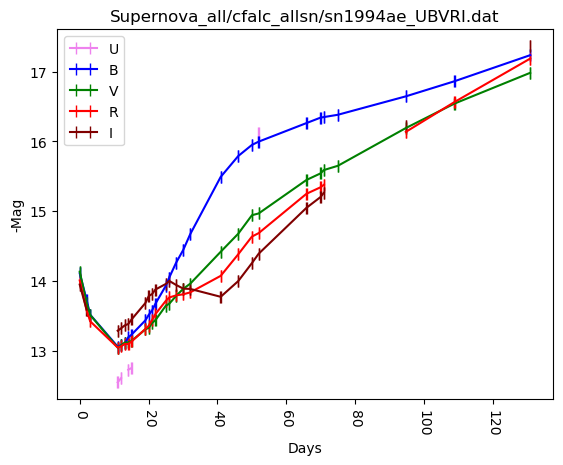

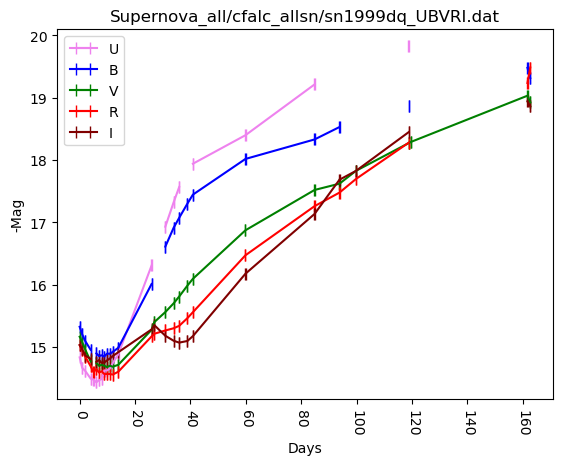

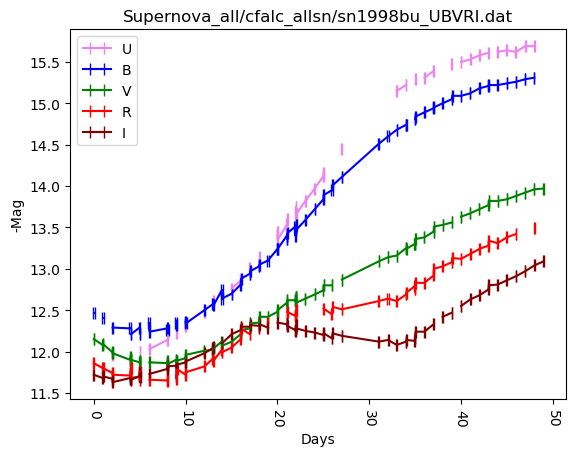

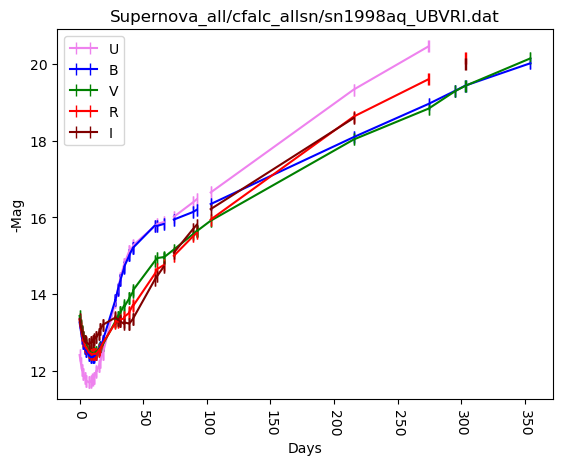

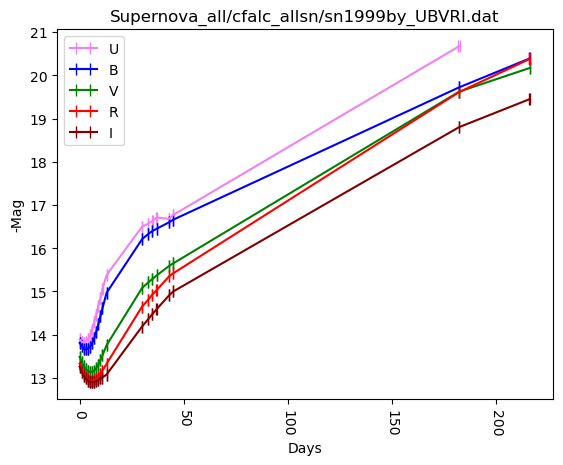

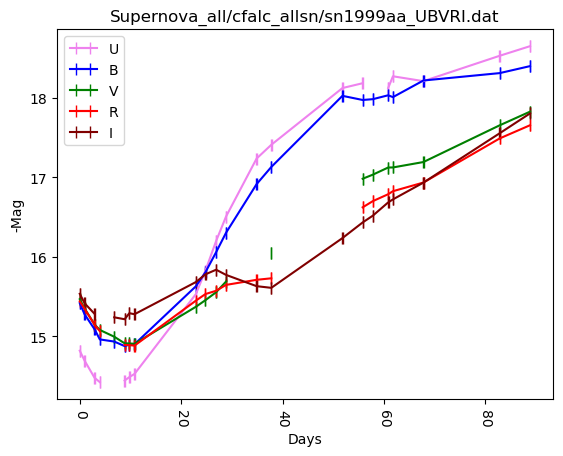

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # plot only, if 20+ observations are available
        if len(df) >= 20:
            # Replace missing data with NaN
            df[df == 99.999] = float("NaN")
            df[df == 99.99] = float("NaN")

            # convert HJD to days from first observation
            df["HJD"]-= df["HJD"].iat[0]

            # Plot light curves for each filter
            for filter, color in [["U", "violet"], ["B", "blue"], ["V", "green"], ["R", "red"], ["I", "#800000"]]:
                plt.errorbar(df["HJD"].values, df[filter].values, label=filter, color=color, xerr=df[filter+"err"].values, capsize=4)

            plt.title(file)
            plt.xlabel("Days")
            plt.ylabel("-Mag")
            plt.xticks(rotation=270)
            plt.legend()
        
            # Show the plot (or save it with plt.savefig("filename.png") if preferred)
            plt.show()
        
    except Exception as e:
        print(f"{file} ignored due to error: {e}")


## All SNe in a single plot for each filter

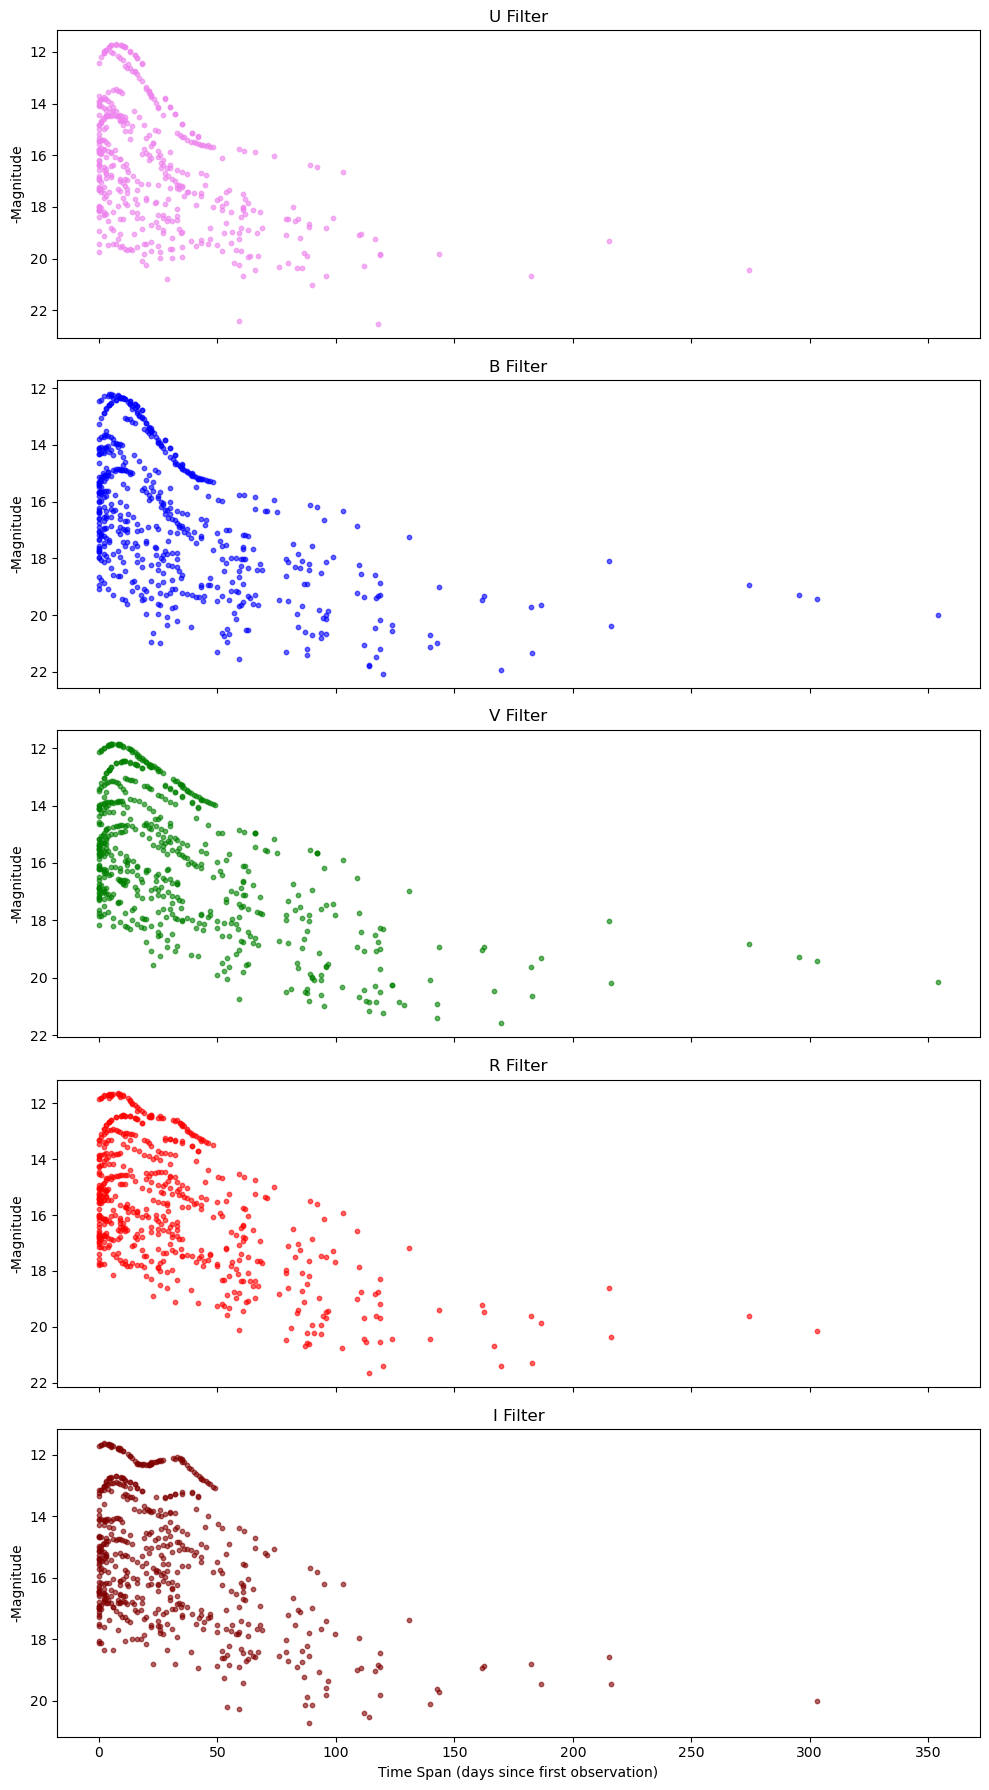

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

# Initialize dictionaries to store time span and magnitude data for each filter across all SNe
all_filters_data = {
    "U": {"Time_Span": [], "Mag": []},
    "B": {"Time_Span": [], "Mag": []},
    "V": {"Time_Span": [], "Mag": []},
    "R": {"Time_Span": [], "Mag": []},
    "I": {"Time_Span": [], "Mag": []}
}

# Loop through each file and extract data for each filter
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")

        # Calculate time span in days (days since the first observation in each file)
        time_span = df["HJD"] - df["HJD"].iloc[0]

        # Collect data for each filter separately
        for filter in ["U", "B", "V", "R", "I"]:
            all_filters_data[filter]["Time_Span"].extend(time_span.values)
            all_filters_data[filter]["Mag"].extend(df[filter].values)
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Set up the color for each filter
filter_colors = {
    "U": "violet",
    "B": "blue",
    "V": "green",
    "R": "red",
    "I": "#800000"
}

# Create a subplot for each filter
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)  # 5 rows, 1 column of subplots

# Plot each filter in its respective subplot
for i, filter in enumerate(["U", "B", "V", "R", "I"]):
    axs[i].scatter(all_filters_data[filter]["Time_Span"], all_filters_data[filter]["Mag"],
                   color=filter_colors[filter], s=10, alpha=0.6)
    axs[i].set_ylabel("-Magnitude")
    axs[i].set_title(f"{filter} Filter")
    axs[i].invert_yaxis()  # Optional: invert y-axis for magnitude

# Set common x-label
axs[-1].set_xlabel("Time Span (days since first observation)")

# Adjust layout
plt.tight_layout()
plt.show()

## with connected lines

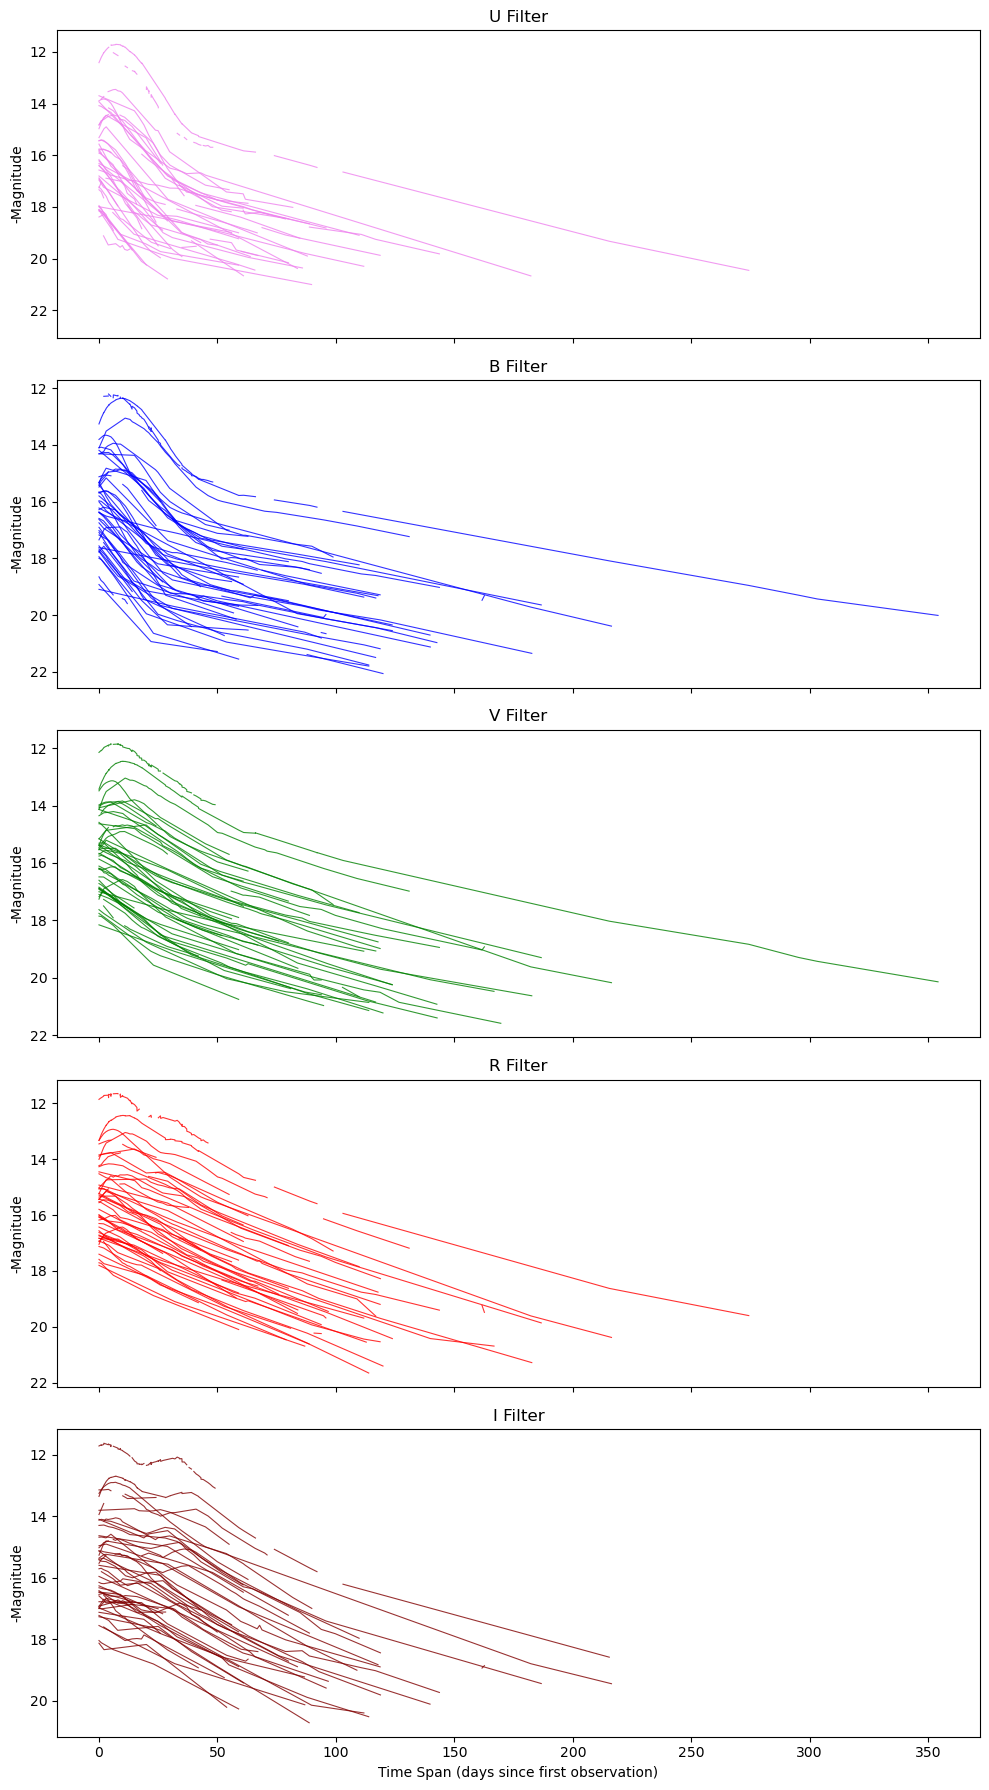

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

# Initialize dictionaries to store data for each filter, with each supernova as a separate entry
all_filters_data = {
    "U": [],
    "B": [],
    "V": [],
    "R": [],
    "I": []
}

# Loop through each file and extract data for each filter, storing each supernova separately
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")

        # Calculate time span in days (days since the first observation in each file)
        time_span = df["HJD"] - df["HJD"].iloc[0]

        # Collect data for each filter separately, storing each supernova as a separate curve
        for filter in ["U", "B", "V", "R", "I"]:
            all_filters_data[filter].append({"Time_Span": time_span.values, "Mag": df[filter].values})
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Set up the color for each filter
filter_colors = {
    "U": "violet",
    "B": "blue",
    "V": "green",
    "R": "red",
    "I": "#800000"
}

# Create a subplot for each filter
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)  # 5 rows, 1 column of subplots

# Plot each filter in its respective subplot, with separate lines for each supernova
for i, filter in enumerate(["U", "B", "V", "R", "I"]):
    for supernova in all_filters_data[filter]:
        # Plot each supernova's data as a line
        axs[i].plot(supernova["Time_Span"], supernova["Mag"], color=filter_colors[filter], alpha=0.8, linewidth=0.8)
    axs[i].set_ylabel("-Magnitude")
    axs[i].set_title(f"{filter} Filter")
    axs[i].invert_yaxis()  # Optional: invert y-axis for magnitude

# Set common x-label
axs[-1].set_xlabel("Time Span (days since first observation)")

# Adjust layout
plt.tight_layout()
plt.show()


## Alligned to the peak luminosity

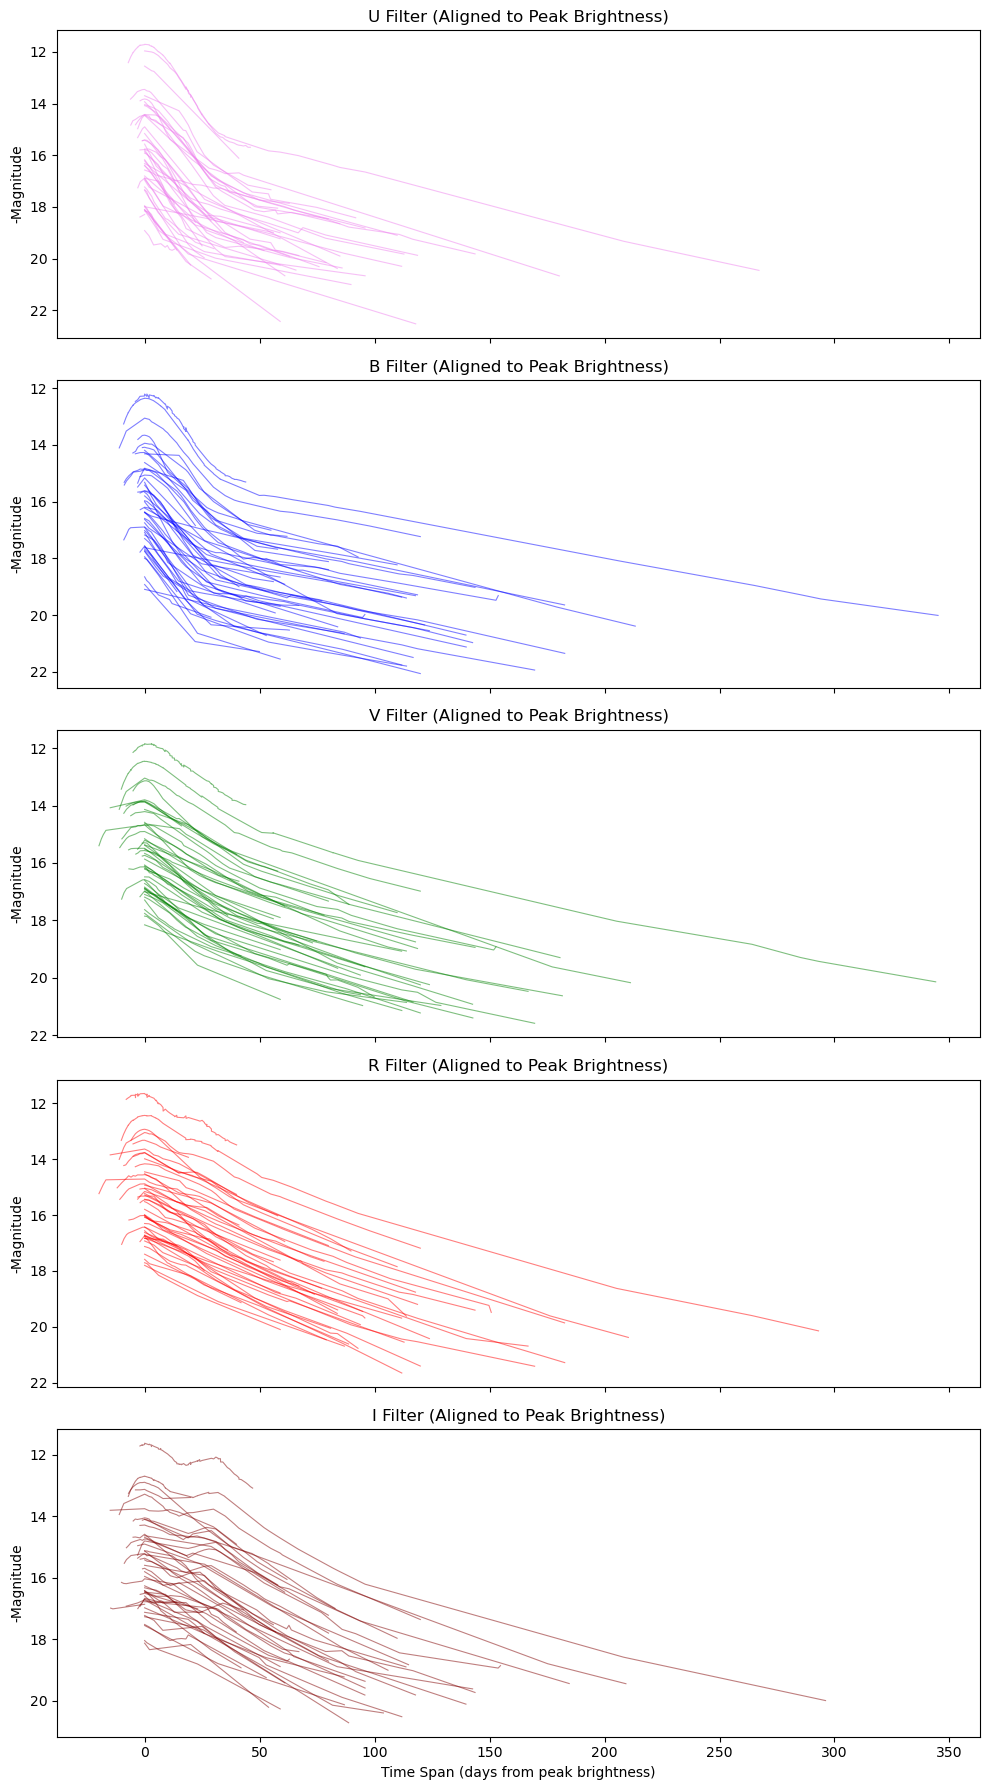

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

# Initialize dictionaries to store data for each filter, with each supernova as a separate entry
all_filters_data = {
    "U": [],
    "B": [],
    "V": [],
    "R": [],
    "I": []
}

# Loop through each file and extract data for each filter, storing each supernova separately
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")

        # Loop through each filter and adjust the time span to start at peak brightness
        for filter in ["U", "B", "V", "R", "I"]:
            # Drop NaN values to avoid issues with finding the minimum
            filter_data = df[['HJD', filter]].dropna()

            # Check if data exists for this filter
            if not filter_data.empty:
                # Find the time (HJD) of peak brightness (minimum magnitude)
                peak_time = filter_data.loc[filter_data[filter].idxmin(), "HJD"]

                # Calculate the time span relative to the peak brightness
                adjusted_time_span = filter_data["HJD"] - peak_time

                # Store the adjusted time span and magnitudes for this supernova
                all_filters_data[filter].append({
                    "Time_Span": adjusted_time_span.values,
                    "Mag": filter_data[filter].values
                })
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Set up colors for each filter
filter_colors = {
    "U": "violet",
    "B": "blue",
    "V": "green",
    "R": "red",
    "I": "#800000"
}

# Create a subplot for each filter
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)  # 5 rows, 1 column of subplots

# Plot each filter in its respective subplot, with separate lines for each supernova
for i, filter in enumerate(["U", "B", "V", "R", "I"]):
    for supernova in all_filters_data[filter]:
        # Plot each supernova's data as a line
        axs[i].plot(supernova["Time_Span"], supernova["Mag"], color=filter_colors[filter], alpha=0.5, linewidth=0.8)
    axs[i].set_ylabel("-Magnitude")
    axs[i].set_title(f"{filter} Filter (Aligned to Peak Brightness)")
    axs[i].invert_yaxis()  # Optional: invert y-axis for magnitude

# Set common x-label
axs[-1].set_xlabel("Time Span (days from peak brightness)")

# Adjust layout
plt.tight_layout()
plt.show()


## Lightcurves of SNe without missing data

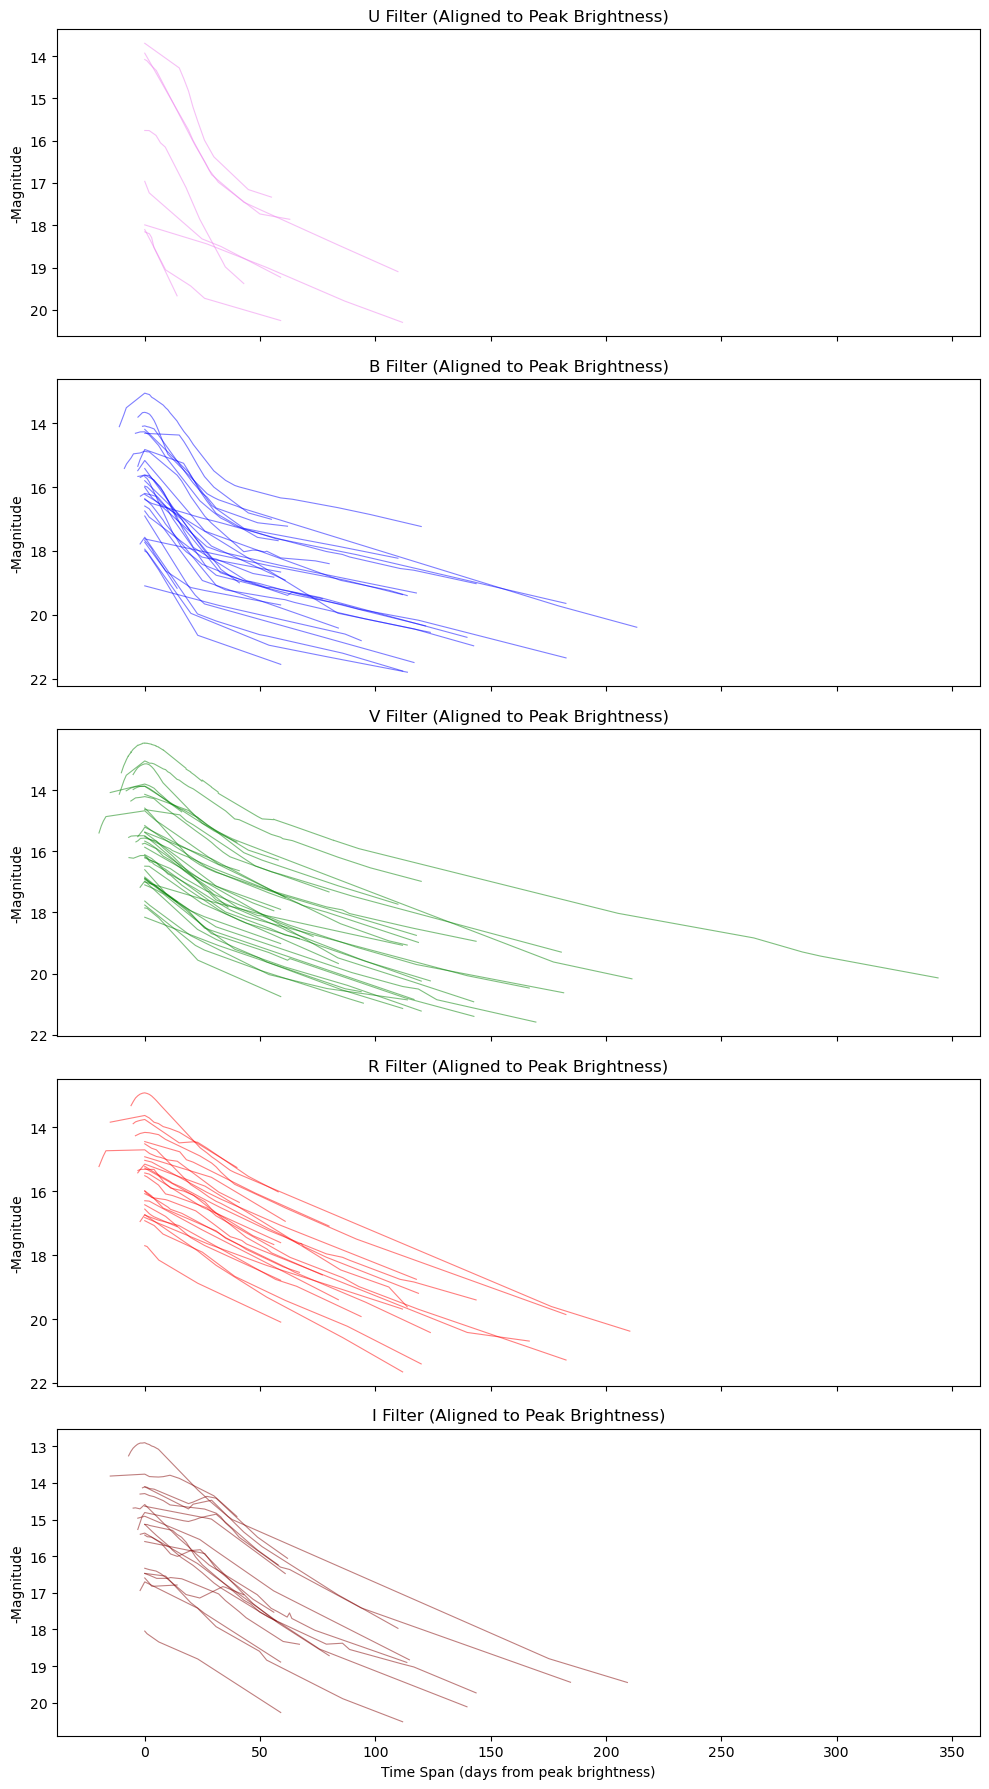

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

# Initialize dictionaries to store data for each filter, with each supernova as a separate entry
all_filters_data = {
    "U": [],
    "B": [],
    "V": [],
    "R": [],
    "I": []
}

# Loop through each file and extract data for each filter, storing each supernova separately
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        # Adjust HJD if it's smaller than 2450000
        if df["HJD"].iat[0] < 2450000:
            df["HJD"] += 2450000

        # Loop through each filter and adjust the time span to start at peak brightness
        for filter in ["U", "B", "V", "R", "I"]:
            # Drop NaN values to avoid issues with finding the minimum
            filter_data = df[['HJD', filter]].dropna()

            # Skip this supernova for this filter if there are any missing values
            if filter_data.shape[0] != df.shape[0]:
                continue

            # Check if data exists for this filter
            if not filter_data.empty:
                # Find the time (HJD) of peak brightness (minimum magnitude)
                peak_time = filter_data.loc[filter_data[filter].idxmin(), "HJD"]

                # Calculate the time span relative to the peak brightness
                adjusted_time_span = filter_data["HJD"] - peak_time

                # Store the adjusted time span and magnitudes for this supernova
                all_filters_data[filter].append({
                    "Time_Span": adjusted_time_span.values,
                    "Mag": filter_data[filter].values
                })
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Set up colors for each filter
filter_colors = {
    "U": "violet",
    "B": "blue",
    "V": "green",
    "R": "red",
    "I": "#800000"
}

# Create a subplot for each filter
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)  # 5 rows, 1 column of subplots

# Plot each filter in its respective subplot, with separate lines for each supernova
for i, filter in enumerate(["U", "B", "V", "R", "I"]):
    for supernova in all_filters_data[filter]:
        # Plot each supernova's data as a line
        axs[i].plot(supernova["Time_Span"], supernova["Mag"], color=filter_colors[filter], alpha=0.5, linewidth=0.8)
    axs[i].set_ylabel("-Magnitude")
    axs[i].set_title(f"{filter} Filter (Aligned to Peak Brightness)")
    axs[i].invert_yaxis()  # Optional: invert y-axis for magnitude

# Set common x-label
axs[-1].set_xlabel("Time Span (days from peak brightness)")

# Adjust layout
plt.tight_layout()
plt.show()


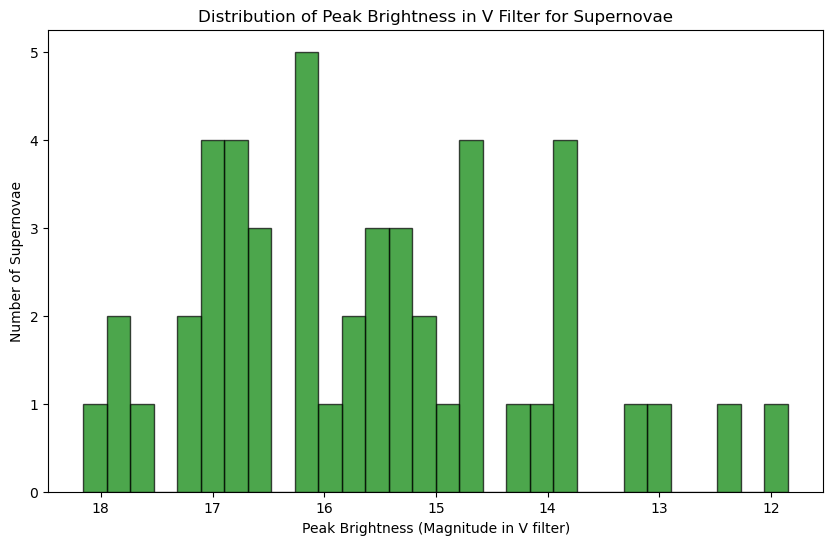

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# List to store peak brightness values for each supernova in the V filter
peak_brightness_V = []

# Loop through each file and extract the peak brightness in the V filter
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")

        # Check if there is data for the V filter without any NaN values
        #if df["V"].notna().all():
            # Find the minimum value in the V filter, representing peak brightness
        peak_brightness = df["V"].min()
        peak_brightness_V.append(peak_brightness)
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Plot the distribution of peak brightness in the V filter
plt.figure(figsize=(10, 6))
plt.hist(peak_brightness_V, bins=30, color="green", edgecolor="black", alpha=0.7)
plt.xlabel("Peak Brightness (Magnitude in V filter)")
plt.ylabel("Number of Supernovae")
plt.title("Distribution of Peak Brightness in V Filter for Supernovae")
plt.gca().invert_xaxis()  # Invert x-axis as lower magnitudes are brighter
plt.show()


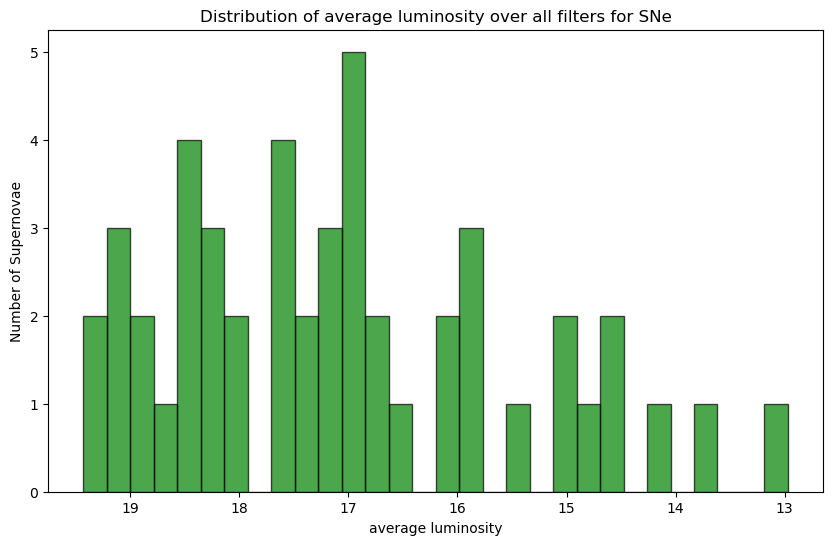

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# List to store peak brightness values for each supernova in the V filter
mean_all = []

# Loop through each file and extract the peak brightness in the V filter
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")

        # Check if there is data for the V filter without any NaN values
        #if df["V"].notna().all():
            # Find the minimum value in the V filter, representing peak brightness
        mean = sum(df[["U","B","V","R","I"]].mean())/5
        mean_all.append(mean)
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Plot the distribution of peak brightness in the V filter
plt.figure(figsize=(10, 6))
plt.hist(mean_all, bins=30, color="green", edgecolor="black", alpha=0.7)
plt.xlabel("average luminosity")
plt.ylabel("Number of Supernovae")
plt.title("Distribution of average luminosity over all filters for SNe")
plt.gca().invert_xaxis()  # Invert x-axis as lower magnitudes are brighter
plt.show()


## Analysis of the form of the light curves

We can observe that the mean peak brightness for each filter are similar, around -19 Mag. The distribution resembles a normal distribution except a few outliers around the lower magnitudes. The distribution is skewed to the right, towards the larger magnitudes. This means most Supernovae have an absolute luminosity around -19 Mag, which is to be expected of a standard candle.

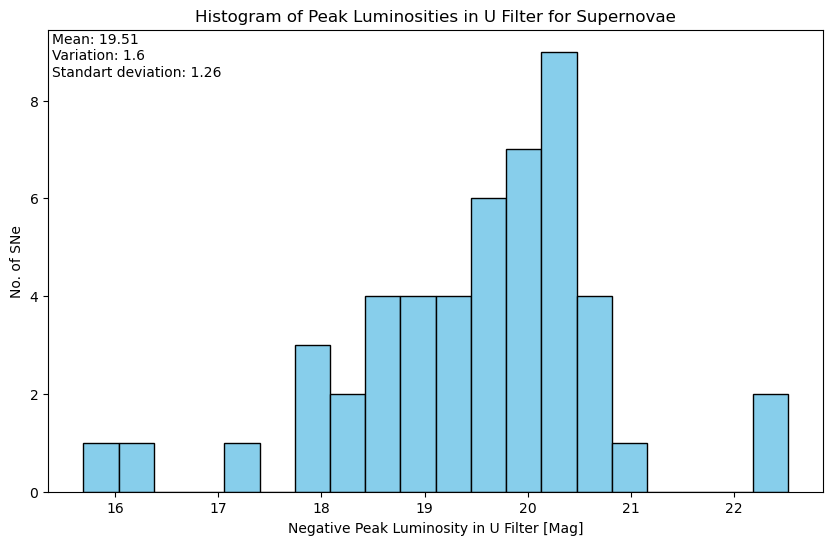

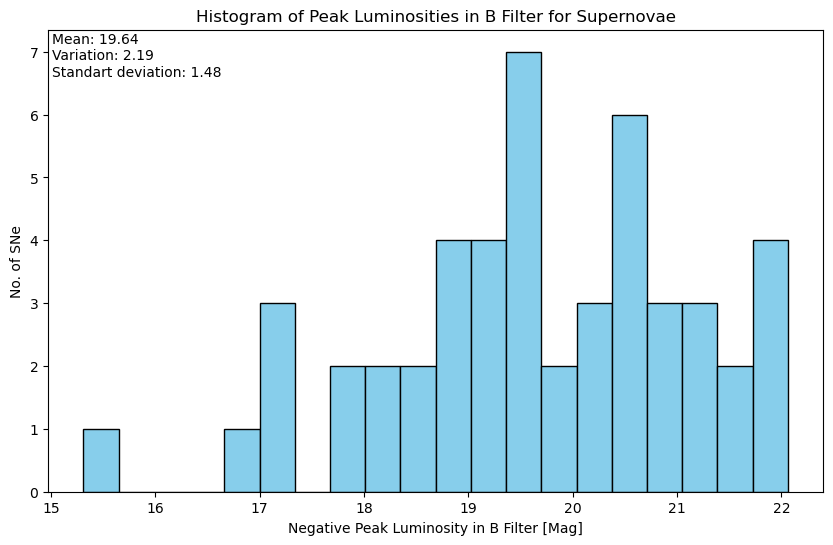

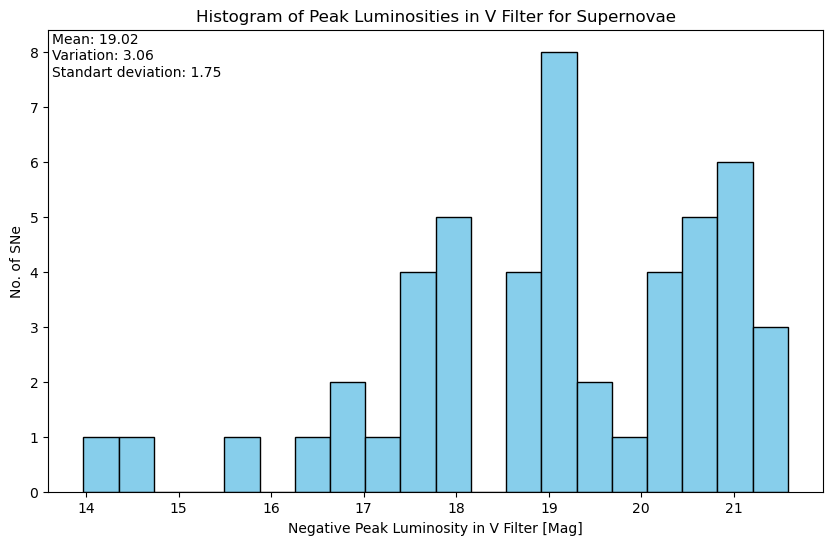

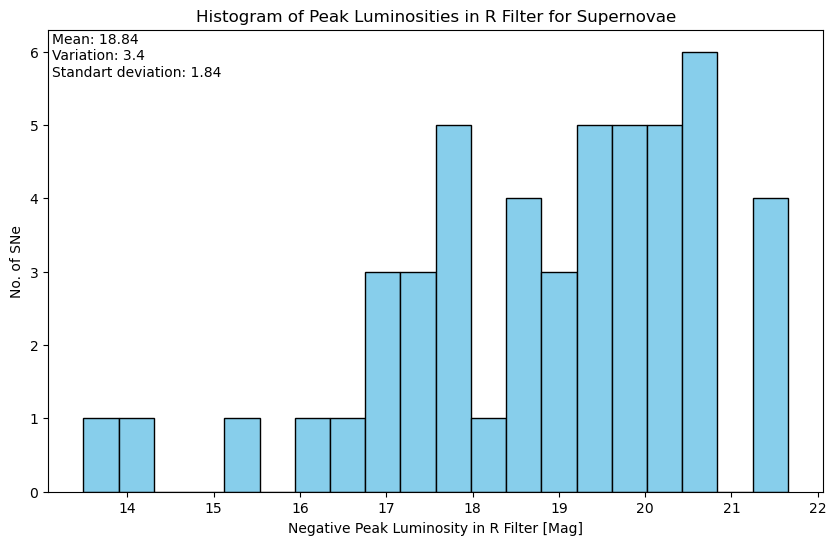

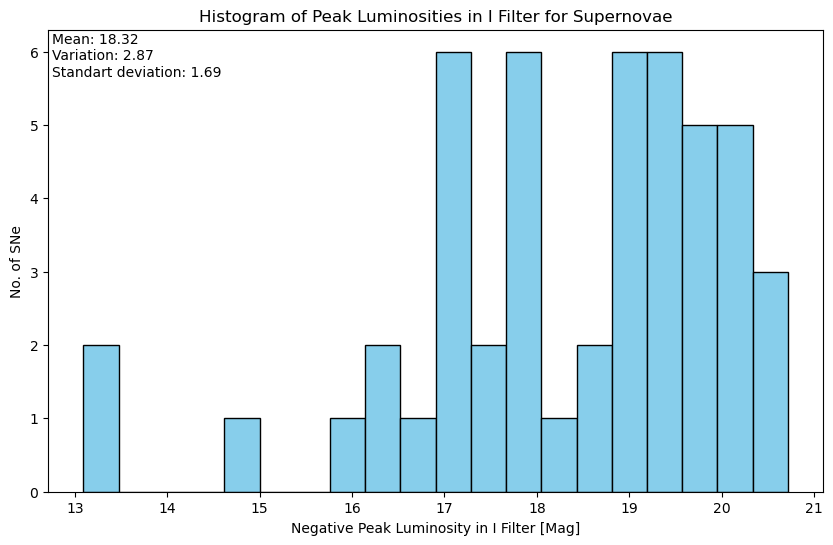

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

u_list = []
b_list = []
v_list = []
r_list = []
i_list = []
filters = [["U",u_list], ["B",b_list], ["V",v_list], ["R",r_list], ["I",i_list]]


for file in glob.glob("Supernova_all/cfalc_allsn/*.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, 
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        for f,d in filters:
            peak_lum = df[f].max()
            d.append(peak_lum)
        
        
    except Exception as e:
        #print(f"{file} ignored due to error: {e}")
        pass


for f,d in filters:
    mean_lum = round(np.mean(d), 2)
    var_lum = round(np.var(d), 2)
    std_lum = round(np.std(d), 2)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(d, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(f'Negative Peak Luminosity in {f} Filter [Mag]')
    plt.ylabel('No. of SNe')
    plt.title(f'Histogram of Peak Luminosities in {f} Filter for Supernovae')
    plt.text(0.005 , 0.9 , f'Mean: {mean_lum} \nVariation: {var_lum} \nStandart deviation: {std_lum}', 
             transform=plt.gca().transAxes )
    plt.show()

We can observe that the mean peak brightness for each filter are similar, around -19 Mag. The distribution resembles a normal distribution except a few outliers around the lower magnitudes. The distribution is skewed to the right, towards the larger magnitudes. This means most Supernovae have an absolute luminosity around -19 Mag, which is to be expected of a standard candle. 